Reading a File 

In [1]:
import nltk
rawdata = open('SMSSpamCollection.tsv').read()
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [46]:
labels = rawdata[0::2] # starts from 0th element and picks up on the second element after that till the end
body = rawdata[1::2] # starts from 1st element and picks up on the second element after that till the end

In [47]:
print(labels[0:4])
print(body[0:4])

['ham', 'spam', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.']


In [48]:
print('Lentgth of Lables : ',len(labels))
print('Lentgth of body : ',len(body))

# There is some discripency here, so we need to investigate

Lentgth of Lables :  5571
Lentgth of body :  5570


In [49]:
print(labels[-3:]) # there is one blank char at the last

['ham', 'ham', '']


Create a Data Frame

In [50]:
import pandas as pd

df_rawdata = pd.DataFrame({
                        'Label' : labels[:-1],
                        'Message':body
                    })

In [51]:
df_rawdata.head()

,Label,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Alternate Way of importing data

In [52]:
rawdata_alternate_way = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header = None) 

In [53]:
rawdata_alternate_way.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### EDA

In [54]:
fullcorpus = rawdata_alternate_way
fullcorpus.columns = ['label','body_text']
fullcorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [55]:
fullcorpus['label'].value_counts()

label
ham     4822
spam     746
Name: count, dtype: int64

In [56]:
print("out of {} rows ,{} are ham and {} are spam".format(len(fullcorpus),
                                                          len(fullcorpus[fullcorpus['label'] == 'ham']),
                                                          len(fullcorpus[fullcorpus['label'] == 'spam'])))

out of 5568 rows ,4822 are ham and 746 are spam


### Remove Punctuations

In [79]:
fullcorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [80]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
def remove_puct(text):
    text_word = [char for char in text if char not in string.punctuation ]
    return text_word

In [82]:
fullcorpus['body_text_wo_punc'] = fullcorpus['body_text'].apply( lambda x: remove_puct(x))

In [83]:
fullcorpus.head()

,label,body_text,body_text_wo_punc
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ..."
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ..."


Correcting code with join fx so that we care combin all the char again

In [84]:
def remove_puct(text):
    text_word = "".join([char for char in text if char not in string.punctuation ])
    return text_word

In [85]:
fullcorpus['body_text_wo_punc_1'] = fullcorpus['body_text'].apply( lambda x: remove_puct(x))
fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

In [86]:
def tokenization(text):
    token = re.split('\W+',text)
    return token

fullcorpus['body_text_tokenization'] = fullcorpus['body_text_wo_punc_1'].apply(lambda x:tokenization(x.lower()))
fullcorpus.head()

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Karthi\AppData\Local\Temp\ipykernel_31384\2356068540.py:2: SyntaxWarning: invalid escape sequence '\W'
  token = re.split('\W+',text)


,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Removing Stopwords

In [87]:
stopword = nltk.corpus.stopwords.words('english')

In [88]:
stopword[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [89]:
def reomve_stopword(text):
    final = [word for word in text if word not in stopword]
    return final

fullcorpus['body_text_wo_stopword'] = fullcorpus['body_text_tokenization'].apply(lambda x:reomve_stopword(x))

fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [90]:
len(re.split('\s',"This is an interesting te+st"))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Karthi\AppData\Local\Temp\ipykernel_31384\4249900955.py:1: SyntaxWarning: invalid escape sequence '\s'
  len(re.split('\s',"This is an interesting te+st"))


5

#### Stemming Process converting words to root words Ex: grows,growing,grow after stemming it converts to grow

In [94]:
def stemmer(tokenized_text):
    stem_text = [ps.stem(word) for word in tokenized_text]
    return stem_text

fullcorpus['body_text_stemming'] = fullcorpus['body_text_wo_stopword'].apply(lambda x : stemmer(x))

fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword,body_text_stemming
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


### Lemmatizer

It also comes down to the root word and but it is morer complex comapare to stemmer. Stemmer simply chops off the affixies but lemmatizer cross look up with dict and comes up with the dic root word. 

In [95]:
import nltk
wn = nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_morphy',
 'lemmatize',
 'morphy']

In [96]:
def lemmatizer(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

fullcorpus['body_text_lemmatized'] = fullcorpus['body_text_wo_stopword'].apply(lambda x : lemmatizer(x))
fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword,body_text_stemming,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### single functions to do all the tasks

In [100]:
def clean_text(raw_text):
    remove_punc = "".join([char.lower() for char in raw_text if char not in string.punctuation])
    tokens = re.split('\W+',remove_punc)
    stem = [ps.stem(word) for word in tokens if word not in stopword]
    return stem
    

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Karthi\AppData\Local\Temp\ipykernel_31384\1161674542.py:3: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+',remove_punc)


### Vectorizer

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(analyzer=clean_text)
x_countvector = count_vector.fit_transform(fullcorpus['body_text'])

In [ ]:
count_vector.get_feature_names_out()[0:20]

array(['', '0', '008704050406', '0089mi', '0121', '01223585236',
       '01223585334', '0125698789', '02', '020603', '0207', '02070836089',
       '02072069400', '02073162414', '02085076972', '020903', '021',
       '050703', '0578', '06'], dtype=object)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(analyzer=clean_text)
x_countvector = count_vector.fit_transform(fullcorpus['body_text'])
count_vec = pd.DataFrame(x_countvector.toarray())
count_vec.columns = count_vector.get_feature_names_out()
count_vec.head(5)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N Grams

In [ ]:
def clean_text_ngrams(raw_text):
    remove_punc = "".join([char.lower() for char in raw_text if char not in string.punctuation])
    tokens = re.split('\W+',remove_punc)
    stem = " ".join([ps.stem(word) for word in tokens if word not in stopword]) # we need a string of words not tokens for n grams
    return stem

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Karthi\AppData\Local\Temp\ipykernel_9512\3416871445.py:3: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+',remove_punc)


In [ ]:
fullcorpus['full_n_grams'] = fullcorpus['body_text'].apply(lambda x:clean_text_ngrams(x))
fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword,body_text_stemming,body_text_lemmatized,full_n_grams
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday


In [ ]:
n_grams = CountVectorizer(ngram_range = (2,2))
X = n_grams.fit_transform(fullcorpus['full_n_grams'])
print(X.shape)
n_grams.get_feature_names_out()

(5568, 31275)


array(['008704050406 sp', '0089mi last', '0121 2025050', ...,
       'üll submit', 'üll take', '〨ud even'], dtype=object)

In [ ]:
n_grams.fit_

In [ ]:
n_grams = CountVectorizer(ngram_range = (2,2))
X = n_grams.fit_transform(fullcorpus['full_n_grams'])
n_gram_df = pd.DataFrame(X.toarray())
n_gram_df.columns = n_grams.get_feature_names_out() 
n_gram_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF_IDF

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf.fit_transform(fullcorpus['body_text'])
print(X_tfidf.shape)
tfidf.get_feature_names_out()
                              

(5568, 8107)


array(['', '0', '008704050406', ..., 'ü', 'üll', '〨ud'], dtype=object)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf.fit_transform(fullcorpus['body_text'])
tfidf_df = pd.DataFrame(X_tfidf[0:20].toarray())
tfidf_df.columns = tfidf.get_feature_names_out()
tfidf_df.iloc[15:20]

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293243,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Feature Creation

We are going to create 2 new features 
1. len of text msgs
2. % of punctuations marks in a text msgs

In [ ]:
fullcorpus['body_text_len']=fullcorpus['body_text'].apply(lambda x: len(x) - x.count(" "))
fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword,body_text_stemming,body_text_lemmatized,full_n_grams,body_text_len
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",ive search right word thank breather promis wo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28


In [ ]:
def punc_per(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

fullcorpus['body_text_punc%'] = fullcorpus['body_text'].apply(lambda x:punc_per(x))
fullcorpus.head()

,label,body_text,body_text_wo_punc,body_text_wo_punc_1,body_text_tokenization,body_text_wo_stopword,body_text_stemming,body_text_lemmatized,full_n_grams,body_text_len,body_text_punc%
0,ham,I've been searching for the right words to tha...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, ...",Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",ive search right word thank breather promis wo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, ...",Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, ...",I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28,7.1


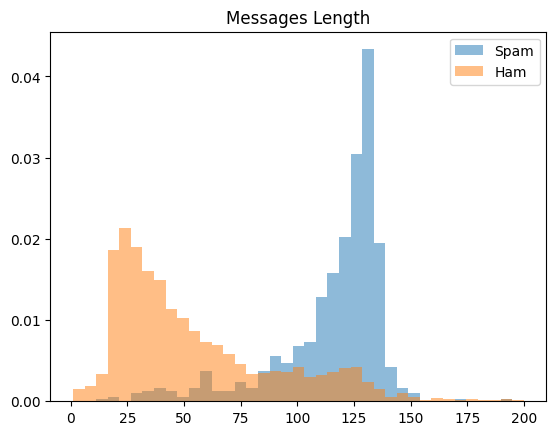

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
bins = np.linspace(1,200,40)
plt.hist(fullcorpus[fullcorpus['label'] == 'spam']['body_text_len'],alpha =0.5,density= True,bins=bins,label= 'Spam')
plt.hist(fullcorpus[fullcorpus['label'] == 'ham']['body_text_len'],alpha = 0.5,density=True,bins=bins,label = 'Ham')
plt.title('Messages Length')
plt.legend()
plt.show()

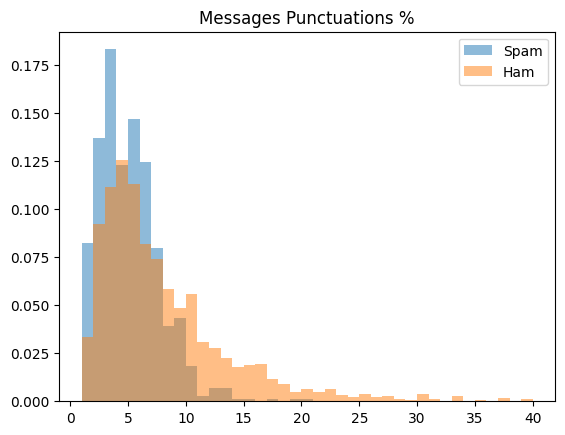

In [ ]:
bins = np.linspace(1,40,40)
plt.hist(fullcorpus[fullcorpus['label'] == 'spam']['body_text_punc%'],alpha =0.5,density= True,bins=bins,label= 'Spam')
plt.hist(fullcorpus[fullcorpus['label'] == 'ham']['body_text_punc%'],alpha = 0.5,density=True,bins=bins,label = 'Ham')
plt.title('Messages Punctuations %')
plt.legend()
plt.show()

Message length is different for Spam and and ham msgs but punctuation % are not from the histograms 

### Transformation

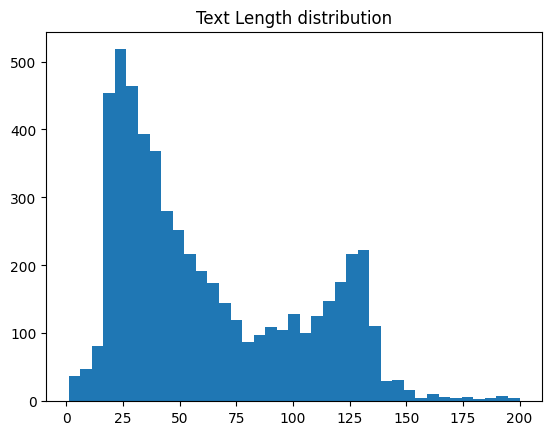

In [ ]:
plt.hist(fullcorpus['body_text_len'],bins = np.linspace(1,200,40))
plt.title('Text Length distribution')
plt.show()

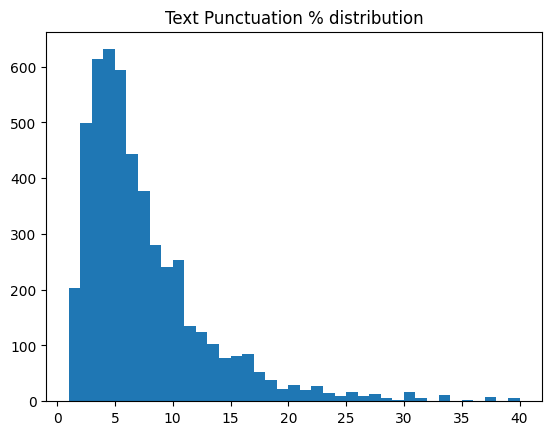

In [ ]:
plt.hist(fullcorpus['body_text_punc%'],bins = np.linspace(1,40,40))
plt.title('Text Punctuation % distribution')
plt.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

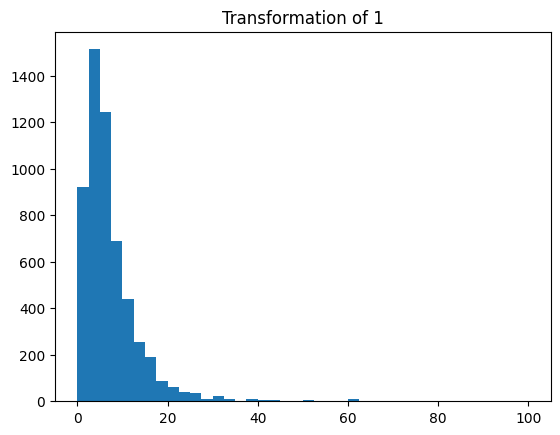

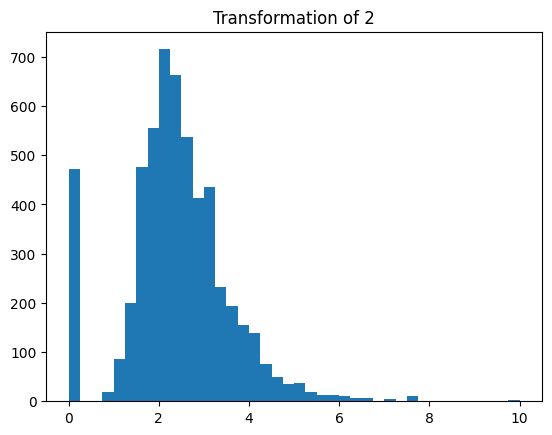

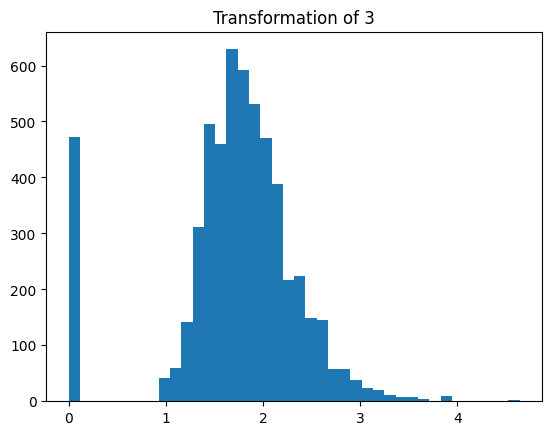

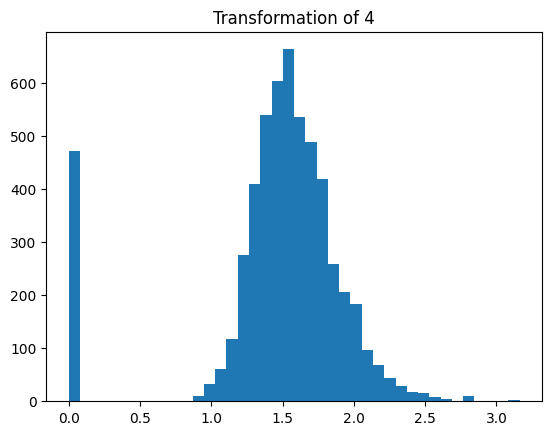

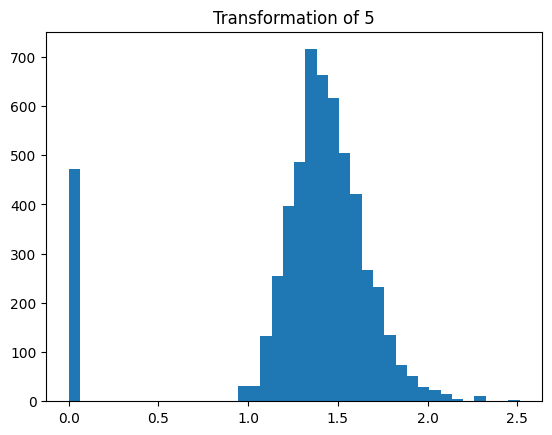

In [ ]:
for i in [1,2,3,4,5]:
    plt.hist(fullcorpus['body_text_punc%']**(1/i), bins = 40)
    plt.title('Transformation of {}'.format(str(i)))
    plt.show()

Transformation 4 and 5 looks good

### Cross Validation with base Estimator As Random Forest Model Building

In [ ]:
X_features = fullcorpus[['body_text_len','body_text_punc%']]
tfidf_fea = pd.DataFrame(X_tfidf.toarray())
tfidf_fea.columns = tfidf.get_feature_names_out()
X_features  = pd.concat([X_features,tfidf_fea],axis =1)
X_features.head()


,body_text_len,body_text_punc%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Features Shape: {} , Lable Shape : {} '.format(X_features.shape,len(fullcorpus)))

Features Shape: (5568, 8109) , Lable Shape : 5568 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
X = X_features
y = fullcorpus['label']
rf = RandomForestClassifier(n_jobs= -1)
k_fold = KFold(n_splits=5)
cross_val_score(rf,X,y,cv = k_fold,scoring='accuracy',n_jobs=-1)


array([0.97486535, 0.97755835, 0.97576302, 0.96495957, 0.96945193])

### Model evaluation using train and split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support as score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
rf_wt_para = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs= -1)
rf_model = rf_wt_para.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_true= y_test,y_pred=y_pred))
precision,recall,fscore,support = score(y_test,y_pred,pos_label='spam',average= 'binary')
print('Precision :{} , Recall : {} , Accuracy : {}'.format(precision,recall,sum((y_test == y_pred))/len(y_test)))

[[967   0]
 [ 53  94]]
Precision :1.0 , Recall : 0.6394557823129252 , Accuracy : 0.952423698384201


### Feature Importance

In [ ]:
sorted(zip(rf_model.feature_importances_,X.columns),reverse= True)[0:10]

[(0.05303078266445578, 'body_text_len'),
 (0.048365878792216474, 'txt'),
 (0.039900936422460904, 'claim'),
 (0.03820937757057383, 'call'),
 (0.02990166417536055, 'free'),
 (0.02743397249400789, 'prize'),
 (0.02422149453904137, 'servic'),
 (0.019818260792269803, 'text'),
 (0.019201481778889997, 'award'),
 (0.018822685435654282, 'repli')]

### Grid Search Hyper Paramaters **Manual**

In [ ]:
def grid_search(n_est,depth):
    rf = RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model = rf.fit(X_train,y_train)
    y_pred_rf = rf_model.predict(X_test)
    precision,recall,fscore,support = score(y_test,y_pred_rf,pos_label='spam',average='binary')
    print('N_estimator : {} , Depth : {} ,Precision : {} , Recall : {} , Accuracy : {}'.format(n_est,depth,round(precision,2),round(recall,2),round((y_pred_rf == y_test).sum()/len(y_pred_rf),2)))

In [ ]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        grid_search(n_est,depth)

N_estimator : 10 , Depth : 10 ,Precision : 0.97 , Recall : 0.21 , Accuracy : 0.89
N_estimator : 10 , Depth : 20 ,Precision : 1.0 , Recall : 0.58 , Accuracy : 0.94
N_estimator : 10 , Depth : 30 ,Precision : 0.97 , Recall : 0.74 , Accuracy : 0.96
N_estimator : 10 , Depth : None ,Precision : 1.0 , Recall : 0.8 , Accuracy : 0.97
N_estimator : 50 , Depth : 10 ,Precision : 1.0 , Recall : 0.24 , Accuracy : 0.9
N_estimator : 50 , Depth : 20 ,Precision : 1.0 , Recall : 0.63 , Accuracy : 0.95
N_estimator : 50 , Depth : 30 ,Precision : 1.0 , Recall : 0.79 , Accuracy : 0.97
N_estimator : 50 , Depth : None ,Precision : 0.98 , Recall : 0.86 , Accuracy : 0.98
N_estimator : 100 , Depth : 10 ,Precision : 1.0 , Recall : 0.24 , Accuracy : 0.9
N_estimator : 100 , Depth : 20 ,Precision : 1.0 , Recall : 0.59 , Accuracy : 0.95
N_estimator : 100 , Depth : 30 ,Precision : 1.0 , Recall : 0.78 , Accuracy : 0.97
N_estimator : 100 , Depth : None ,Precision : 1.0 , Recall : 0.86 , Accuracy : 0.98


### Grid SearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf_gs = RandomForestClassifier()
param = {'n_estimators' : [10,150,300],
         'max_depth' : [30,60,90,None]
        }
gs = GridSearchCV(rf_gs,param,cv=5)
gs_fit = gs.fit(X,y) # fitting tfidf vectorising pipeline
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,36.960828,0.824667,0.329842,0.013794,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.976661,0.974865,0.967655,0.972147,0.973957,0.003778,1
7,18.146788,0.074697,0.228605,0.001374,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975763,0.978456,0.976661,0.968553,0.970350,0.973957,0.003821,2
11,39.823050,0.304627,0.358019,0.010033,None,300,"{'max_depth': None, 'n_estimators': 300}",0.979354,0.974865,0.974865,0.969452,0.969452,0.973598,0.003761,3
10,20.361447,0.333468,0.241534,0.005777,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.975763,0.975763,0.965858,0.971249,0.973238,0.004239,4
6,1.674432,0.091150,0.140264,0.009551,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.975763,0.973968,0.972172,0.967655,0.972147,0.972341,0.002697,5


In [ ]:
features = fullcorpus[['body_text_len','body_text_punc%']]
countvector_fea = pd.DataFrame(x_countvector.toarray())
countvector_fea.columns = count_vector.get_feature_names_out()
countvector_fea_features  = pd.concat([features,countvector_fea],axis =1)
countvector_fea_features.head()

,body_text_len,body_text_punc%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,160,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rf_gs = RandomForestClassifier()
param = {'n_estimators' : [10,150,300],
         'max_depth' : [30,60,90,None]
        }
gs = GridSearchCV(rf_gs,param,cv=5)
gs_fit = gs.fit(countvector_fea_features,y) # fitting count vector vectorising pipeline
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,12.143980,0.202957,0.166709,0.025541,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.974865,0.973968,0.969452,0.969452,0.973059,0.003173,1
7,11.594142,0.324661,0.158886,0.013635,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.973968,0.973070,0.966757,0.973046,0.972880,0.003482,2
8,21.958942,0.333095,0.216567,0.005177,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.974865,0.973968,0.967655,0.969452,0.972700,0.003630,3
11,23.893912,0.354042,0.223282,0.003786,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.974865,0.973968,0.966757,0.969452,0.972699,0.004130,4
4,9.001659,0.028688,0.138455,0.001771,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.976661,0.973968,0.971275,0.964960,0.966757,0.970724,0.004360,5


Final Model BUilding

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
raw_data = pd.read_csv('SMSSpamCollection.tsv', delimiter= '\t',header = None)
raw_data.columns = ['label','body_text']
raw_data['text_len'] = raw_data['body_text'].apply(lambda x : len(x) - x.count(" "))
raw_data['text_pun%'] = raw_data['body_text'].apply(lambda x: punc_per(x))
raw_data.head()

,label,body_text,text_len,text_pun%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


Cleaning for vectorization

In [ ]:
stopwords1 = nltk.corpus.stopwords.words('english')
ps2 = nltk.PorterStemmer()

def clean_text_final(raw_text):
   text = "".join([char for char in raw_text if char not in string.punctuation]) # remove punctuations
   tokens = re.split('\W+',text) # create tokens
   final_text = [ps.stem(word)for word in tokens if word not in stopwords1] # removing stopwords and stemming each word
   return final_text

<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Karthi\AppData\Local\Temp\ipykernel_9512\2440611707.py:6: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+',text) # create tokens


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(raw_data[['body_text','text_len','text_pun%']],raw_data['label'],test_size=0.2)

### Vectorize Text

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text_final)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_train = pd.DataFrame(tfidf_train.toarray())
tfidf_train.columns = tfidf_vect.get_feature_names_out()
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])
tfidf_test = pd.DataFrame(tfidf_test.toarray())
tfidf_test.columns = tfidf_vect.get_feature_names_out()
tfidf_test.columns = tfidf_vect.get_feature_names_out()
X_train_vec = pd.concat([X_train[['text_len','text_pun%']].reset_index(drop = True),tfidf_train],axis = 1)
X_test_vec = pd.concat([X_test[['text_len','text_pun%']].reset_index(drop = True),tfidf_test],axis = 1)

In [ ]:
print(len(raw_data))
print(len(X_test_vec),X_test_vec.shape)
print(len(X_train_vec),X_train_vec.shape)
print(len(tfidf_vect.get_feature_names_out()))

5568
1114 (1114, 7230)
4454 (4454, 7230)
7228


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

### RandomForest Model

In [ ]:
rf_final = RandomForestClassifier(n_estimators=150,max_depth=None,n_jobs=-1)
start = time.time()
model_final = rf_final.fit(X_train_vec,y_train)
end = time.time()
fit_time = round((end-start),2)
start = time.time()
y_pred_final = model_final.predict(X_test_vec)
end = time.time()
pred_time = round((end-start),2)
precision,recall,fscore,support = score(y_test,y_pred_final,pos_label='spam',average='binary')
print('Fit time: {} / Pred Time = {} / Precision : {} / Recall : {}'.format(fit_time,pred_time,precision,recall))


Fit time: 3.03 / Pred Time = 0.21 / Precision : 1.0 / Recall : 0.8266666666666667


### GradientBoosting Model

In [ ]:
gb_final = GradientBoostingClassifier(n_estimators=150,max_depth=11)
start = time.time()
model_final = gb_final.fit(X_train_vec,y_train)
end = time.time()
fit_time = round((end-start),2)
start = time.time()
y_pred_final = model_final.predict(X_test_vec)
end = time.time()
pred_time = round((end-start),2)
precision,recall,fscore,support = score(y_test,y_pred_final,pos_label='spam',average='binary')
print('Fit time: {} / Pred Time = {} / Precision : {} / Recall : {}'.format(fit_time,pred_time,precision,recall))


Fit time: 337.02 / Pred Time = 0.24 / Precision : 0.9682539682539683 / Recall : 0.8133333333333334
